# EDA(Exploratory Data Analysis)



1. Load datasets
2. Clean data(missing values,duplicates,types)
3. Treat outliers
4. Univariate , Bivariate  and Multivariate Analysis
5. Insights 

### Outlier - A data point that is siginificantly different from other observations in a dataset
#### How Outliers will come--?
    1.Measurment errors
    2.Data entry mistakes
#### Why they are importnat--?
    1.They can be errors
    2.They effect data analysis 
#### How to identify the outliers--?
    1.Visualization techinques
        -->Box plots
        -->Scatter plots
        -->Histograms
    2.Statistical methods
        -->InterQuartuile Range(IQR)
        -->Z-Score
     


### Univariate Analysis - a  method that analysis a single variable to descirbe its characterisitics and finding the  patterns and summarize the data .
#### It involves only one variable

### Bivariate Analysis - It will give relationship between two variables. It helps to find if there is an any co-relation between two variables ,association or connection betweeen two variables.
#### It involves two variables (x & y)
### Multivariate Analysis - To understand how multiple factors interact and influence each other
#### It involves more than 2 variables 

#### Example:-
How our age,income and education level together influence the purchasing behaviour.


# ETL




# ELT

## EDA :<Dataset>
1. Load and Overview
2. Cleaning  (missing ,duplicates,dtypes)
3. Uni , Bi & Muli analysis
4. Treat outliers - IQR
5. Feature Engineering 
6. Key Insights


### Feature Engineering - "Feature engineering is the process of turning raw data into useful features "  that helps to improve the performance of machine learning models .


##### 1. Load libraries and Dataset

In [1]:
# importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Basic information & Overview
print("Shape of dataset:",df.shape)
print("\nData info:")
df.info()

#Summary  statistics
df.describe(include='all')


Shape of dataset: (891, 15)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. Missing Values analysis

In [4]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) *100

})
missing.sort_values(by='missing_percent',ascending=False)




,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


##### 4. Handling Missing Values

In [10]:
#Fill the numeric missing values with the mean 
df['age']=df['age'].fillna(df['age'].mean())


# Fill categorical missing values with modes
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

#Drop 'deck' column (it has too many missing values )
df.drop(columns=['deck'], inplace=True)


print("Missing values after cleaning :\n",df.isnull().sum().sum())


Missing values after cleaning :
 2


##### Insight:
We filled important columns and removed highly missing ones
This keeps maximum information while making dataset clean

In [12]:
# Duplicates and Data type check 
print("Duplicate rows:",df.duplicated().sum())

df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


#### Analysis


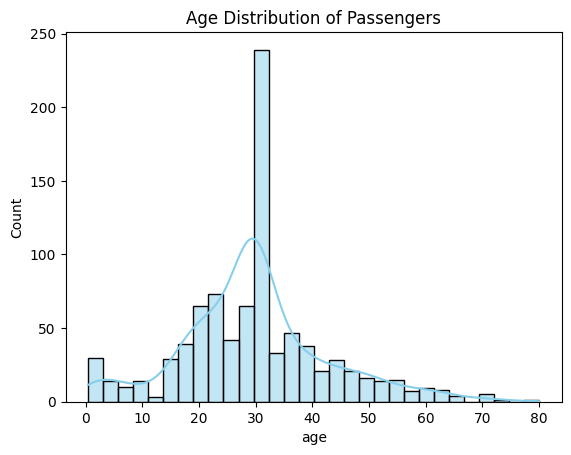

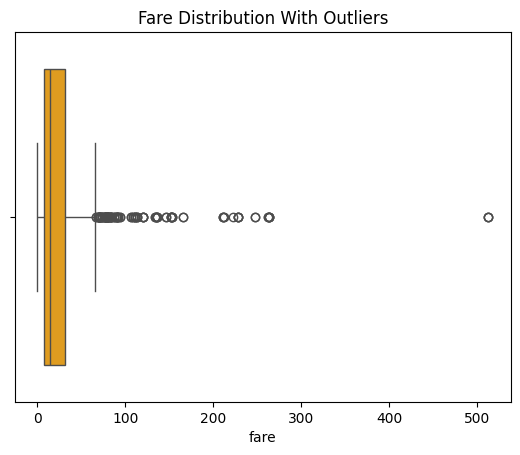

In [ ]:
# univariate analysis - numeric value 
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#histogram :Age 
sns.histplot(df['age'],bins=0,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

# Boxplot:Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution With Outliers")
plt.show()

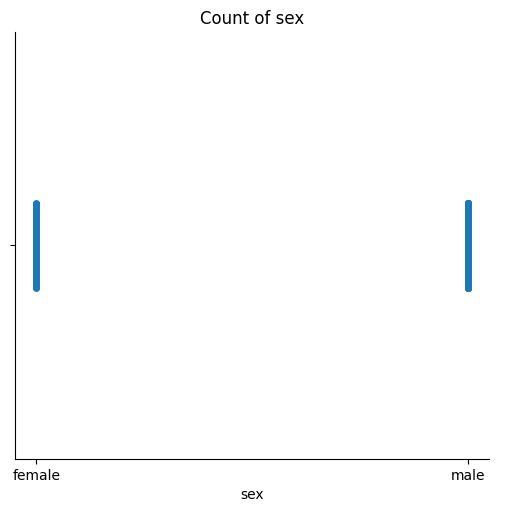

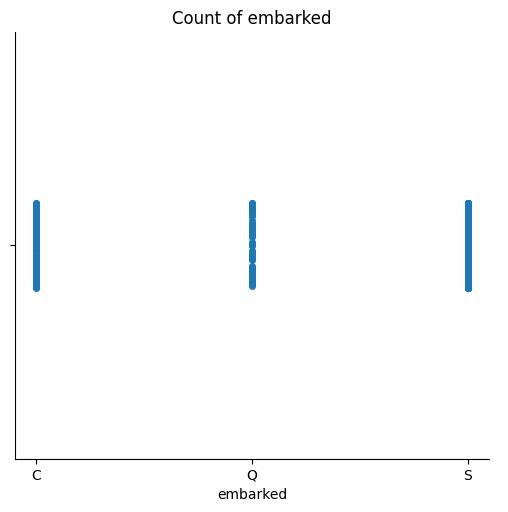

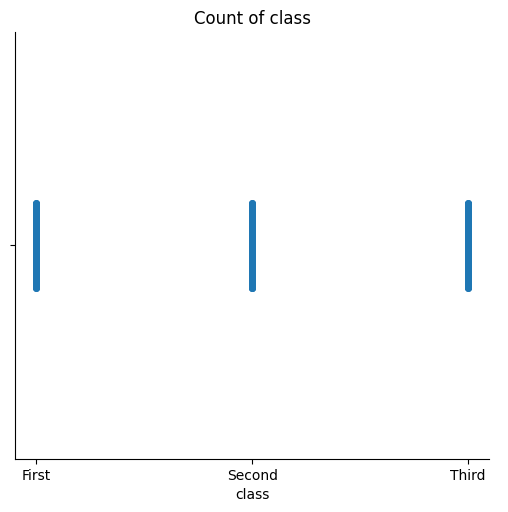

In [23]:
# Univariate Analysis - Categorical Features 
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()


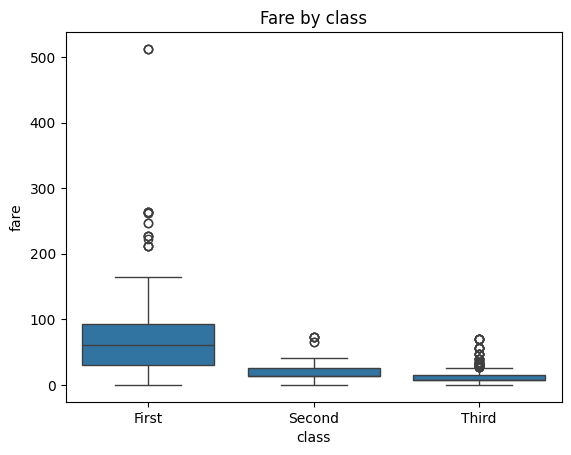

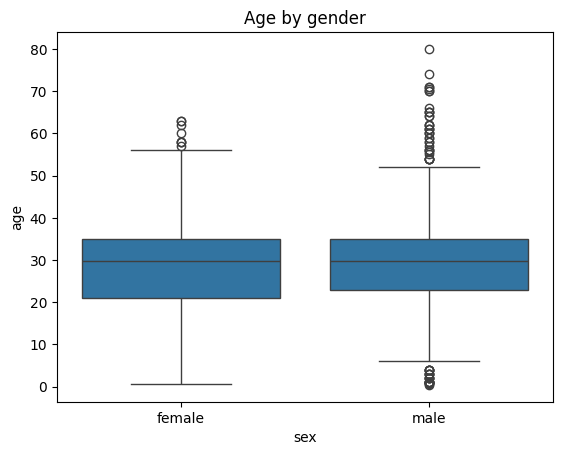

In [ ]:
# Bivariate Analysis - Categorical vs Numeric

sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()
#
sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by gender")
plt.show()


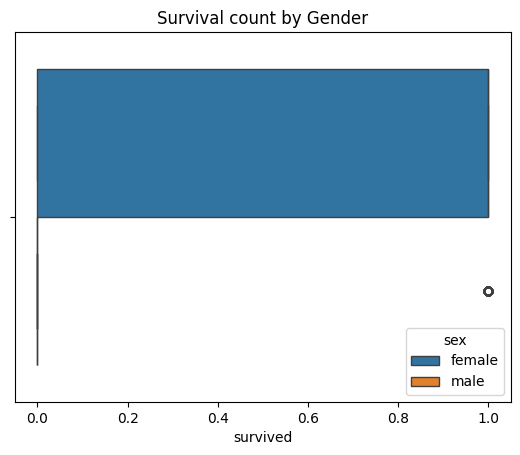

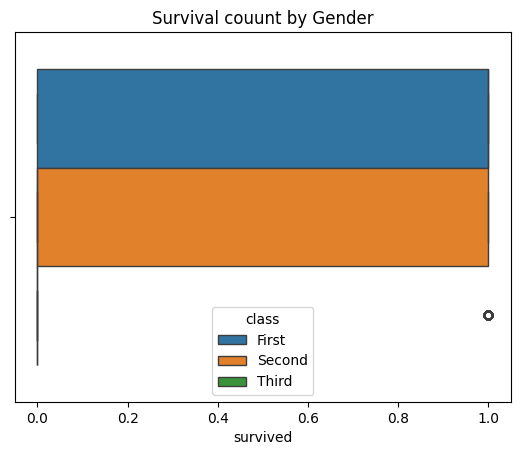

In [27]:
# BiVariate Analysis - Categorical vs Categorical 
sns.boxplot(x='survived', hue='sex',data=df)
plt.title("Survival count by Gender")
plt.show()

sns.boxplot(x='survived' , hue='class', data=df)
plt.title("Survival couunt by Gender")
plt.show()

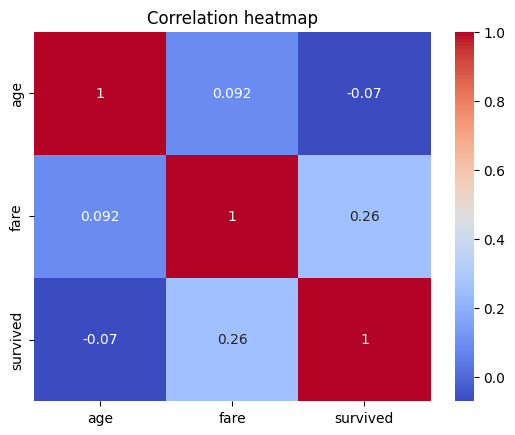

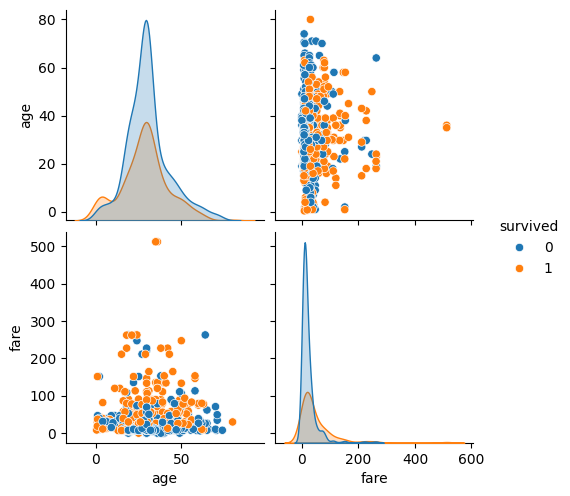

In [30]:
#Correlaation and multivariate analysis 
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')

plt.show()


##### Insights:
1. Fare has a positive correlation with survival 
2. Age shows a slight negative correlation with survival 

#### Outlier treat


Number of outliers in fare: 116


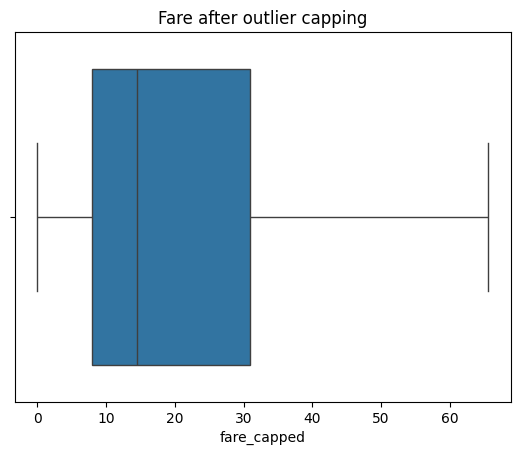

In [35]:
# Outlier Dection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outlier=df[(df['fare']<lower ) | (df['fare']>upper)]
print("Number of outliers in fare:",len(outlier))

# Outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()


#### Feature Engineering


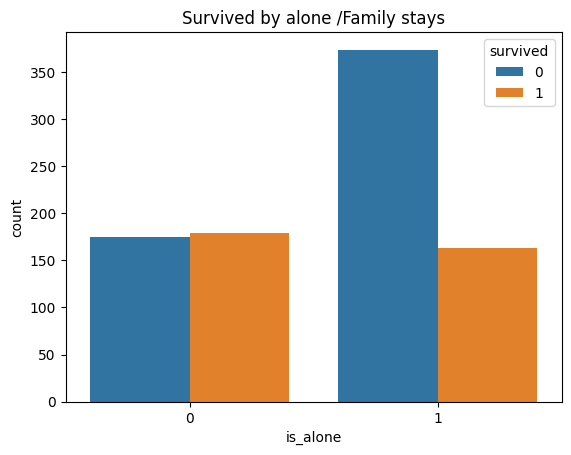

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [37]:
# create new features
df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1 ).astype(int)
sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survived by alone /Family stays")
plt.show()
df[['family_size','is_alone','survived']].head()

In [38]:
#Export the Cleaned data 
df.to_csv("titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_Cleaned.csv")


 Cleaned Titanic data saved as titanic_Cleaned.csv
